### Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import os
import shutil
import glob
import random
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

### Creating train, valid and test batches

In [3]:
train_path = 'BirdDataSet/train'
valid_path = 'BirdDataSet/valid'
test_path = 'BirdDataSet/test'

In [4]:
class_labels = [
    "ANNAS HUMMINGBIRD",
    "ANTBIRD",
    "BALD EAGLE",
    "BARN OWL",
    "BARN SWALLOW",
    "BELTED KINGFISHER",
    "BLACK SWAN",
    "DOWNY WOODPECKER",
    "EMPEROR PENGUIN",
    "OSTRICH",
    "PEACOCK",
    "TRUMPTER SWAN"
]

In [5]:
train_batches = ImageDataGenerator() \
    .flow_from_directory(directory=train_path, target_size=(224, 224), classes= class_labels, batch_size=32)

valid_batches = ImageDataGenerator() \
    .flow_from_directory(directory=valid_path, target_size=(224, 224), classes= class_labels, batch_size=10)

test_batches = ImageDataGenerator() \
    .flow_from_directory(directory=test_path, target_size=(224, 224), classes= class_labels, batch_size=10)

Found 4784 images belonging to 12 classes.
Found 180 images belonging to 12 classes.
Found 60 images belonging to 12 classes.


### Visualizing data

In [6]:
imgs, labels = next(train_batches)

In [7]:
def plotImages(image_arr, batch_size):
    fig, axes = plt.subplots(1, batch_size, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(image_arr, axes):
        ax.imshow((img).astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

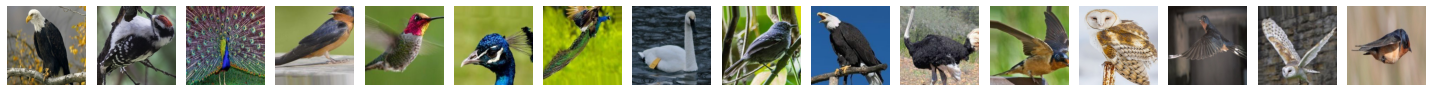

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.

In [8]:
plotImages(imgs, 16)
print(labels)

### Creating and training model

In [9]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (1,1), activation="relu", padding="same", input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dropout(0.1),
    Dense(units=12, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

In [11]:
model.compile(optimizer=Adam
              (learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x=train_batches,
         steps_per_epoch=len(train_batches),
         validation_data=valid_batches,
         validation_steps=len(valid_batches),
         epochs=5,
         verbose=1)

Epoch 1/5
150/150 [==============================] - 251s 2s/step - loss: 5.5946 - accuracy: 0.3198 - val_loss: 1.4171 - val_accuracy: 0.5444
Epoch 2/5
150/150 [==============================] - 216s 1s/step - loss: 1.2224 - accuracy: 0.6225 - val_loss: 0.8001 - val_accuracy: 0.7500
Epoch 3/5
150/150 [==============================] - 184s 1s/step - loss: 0.7064 - accuracy: 0.7657 - val_loss: 0.7220 - val_accuracy: 0.7667
Epoch 4/5
150/150 [==============================] - 179s 1s/step - loss: 0.4709 - accuracy: 0.8413 - val_loss: 0.6420 - val_accuracy: 0.8278
Epoch 5/5
150/150 [==============================] - 178s 1s/step - loss: 0.3007 - accuracy: 0.9061 - val_loss: 0.6443 - val_accuracy: 0.8333


In [13]:
model.save("12_birds_model_v4")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: 12_birds_model_v4\assets


### Predictions and results

In [45]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [46]:
np.round(predictions)

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [47]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=1))

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
test_batches.class_indices

{'ANNAS HUMMINGBIRD': 0,
 'ANTBIRD': 1,
 'BALD EAGLE': 2,
 'BARN OWL': 3,
 'BARN SWALLOW': 4,
 'BELTED KINGFISHER': 5,
 'BLACK SWAN': 6,
 'DOWNY WOODPECKER': 7,
 'EMPEROR PENGUIN': 8,
 'OSTRICH': 9,
 'PEACOCK': 10,
 'TRUMPTER SWAN': 11}

Confusion matrix, without normalization
[[0 1 0 0 1 1 0 0 1 0 0 1]
 [0 0 1 0 0 0 1 2 0 1 0 0]
 [1 1 0 0 0 1 0 0 0 0 2 0]
 [0 1 1 0 0 0 0 2 1 0 0 0]
 [0 0 1 1 0 0 0 0 0 1 1 1]
 [1 1 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 1 1 0 1 0 0 1 1]
 [1 0 0 0 0 0 1 1 1 0 1 0]
 [2 0 0 1 1 0 1 0 0 0 0 0]
 [0 0 1 0 1 0 1 0 1 1 0 0]
 [0 1 0 0 1 0 0 0 1 1 0 1]
 [0 1 1 1 0 0 1 0 0 0 0 1]]


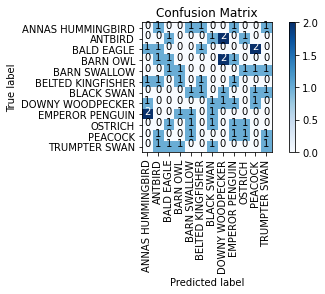

In [48]:
cm_plot_labels = class_labels
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [21]:
class_dict = {
    0:"ANNAS HUMMINGBIRD",
    1:"ANTBIRD",
    2:"BALD EAGLE",
    3:"BARN OWL",
    4:"BARN SWALLOW",
    5:"BELTED KINGFISHER",
    6:"BLACK SWAN",
    7:"DOWNY WOODPECKER",
    8:"EMPEROR PENGUIN",
    9:"OSTRICH",
    10:"PEACOCK",
    11:"TRUMPTER SWAN"
}

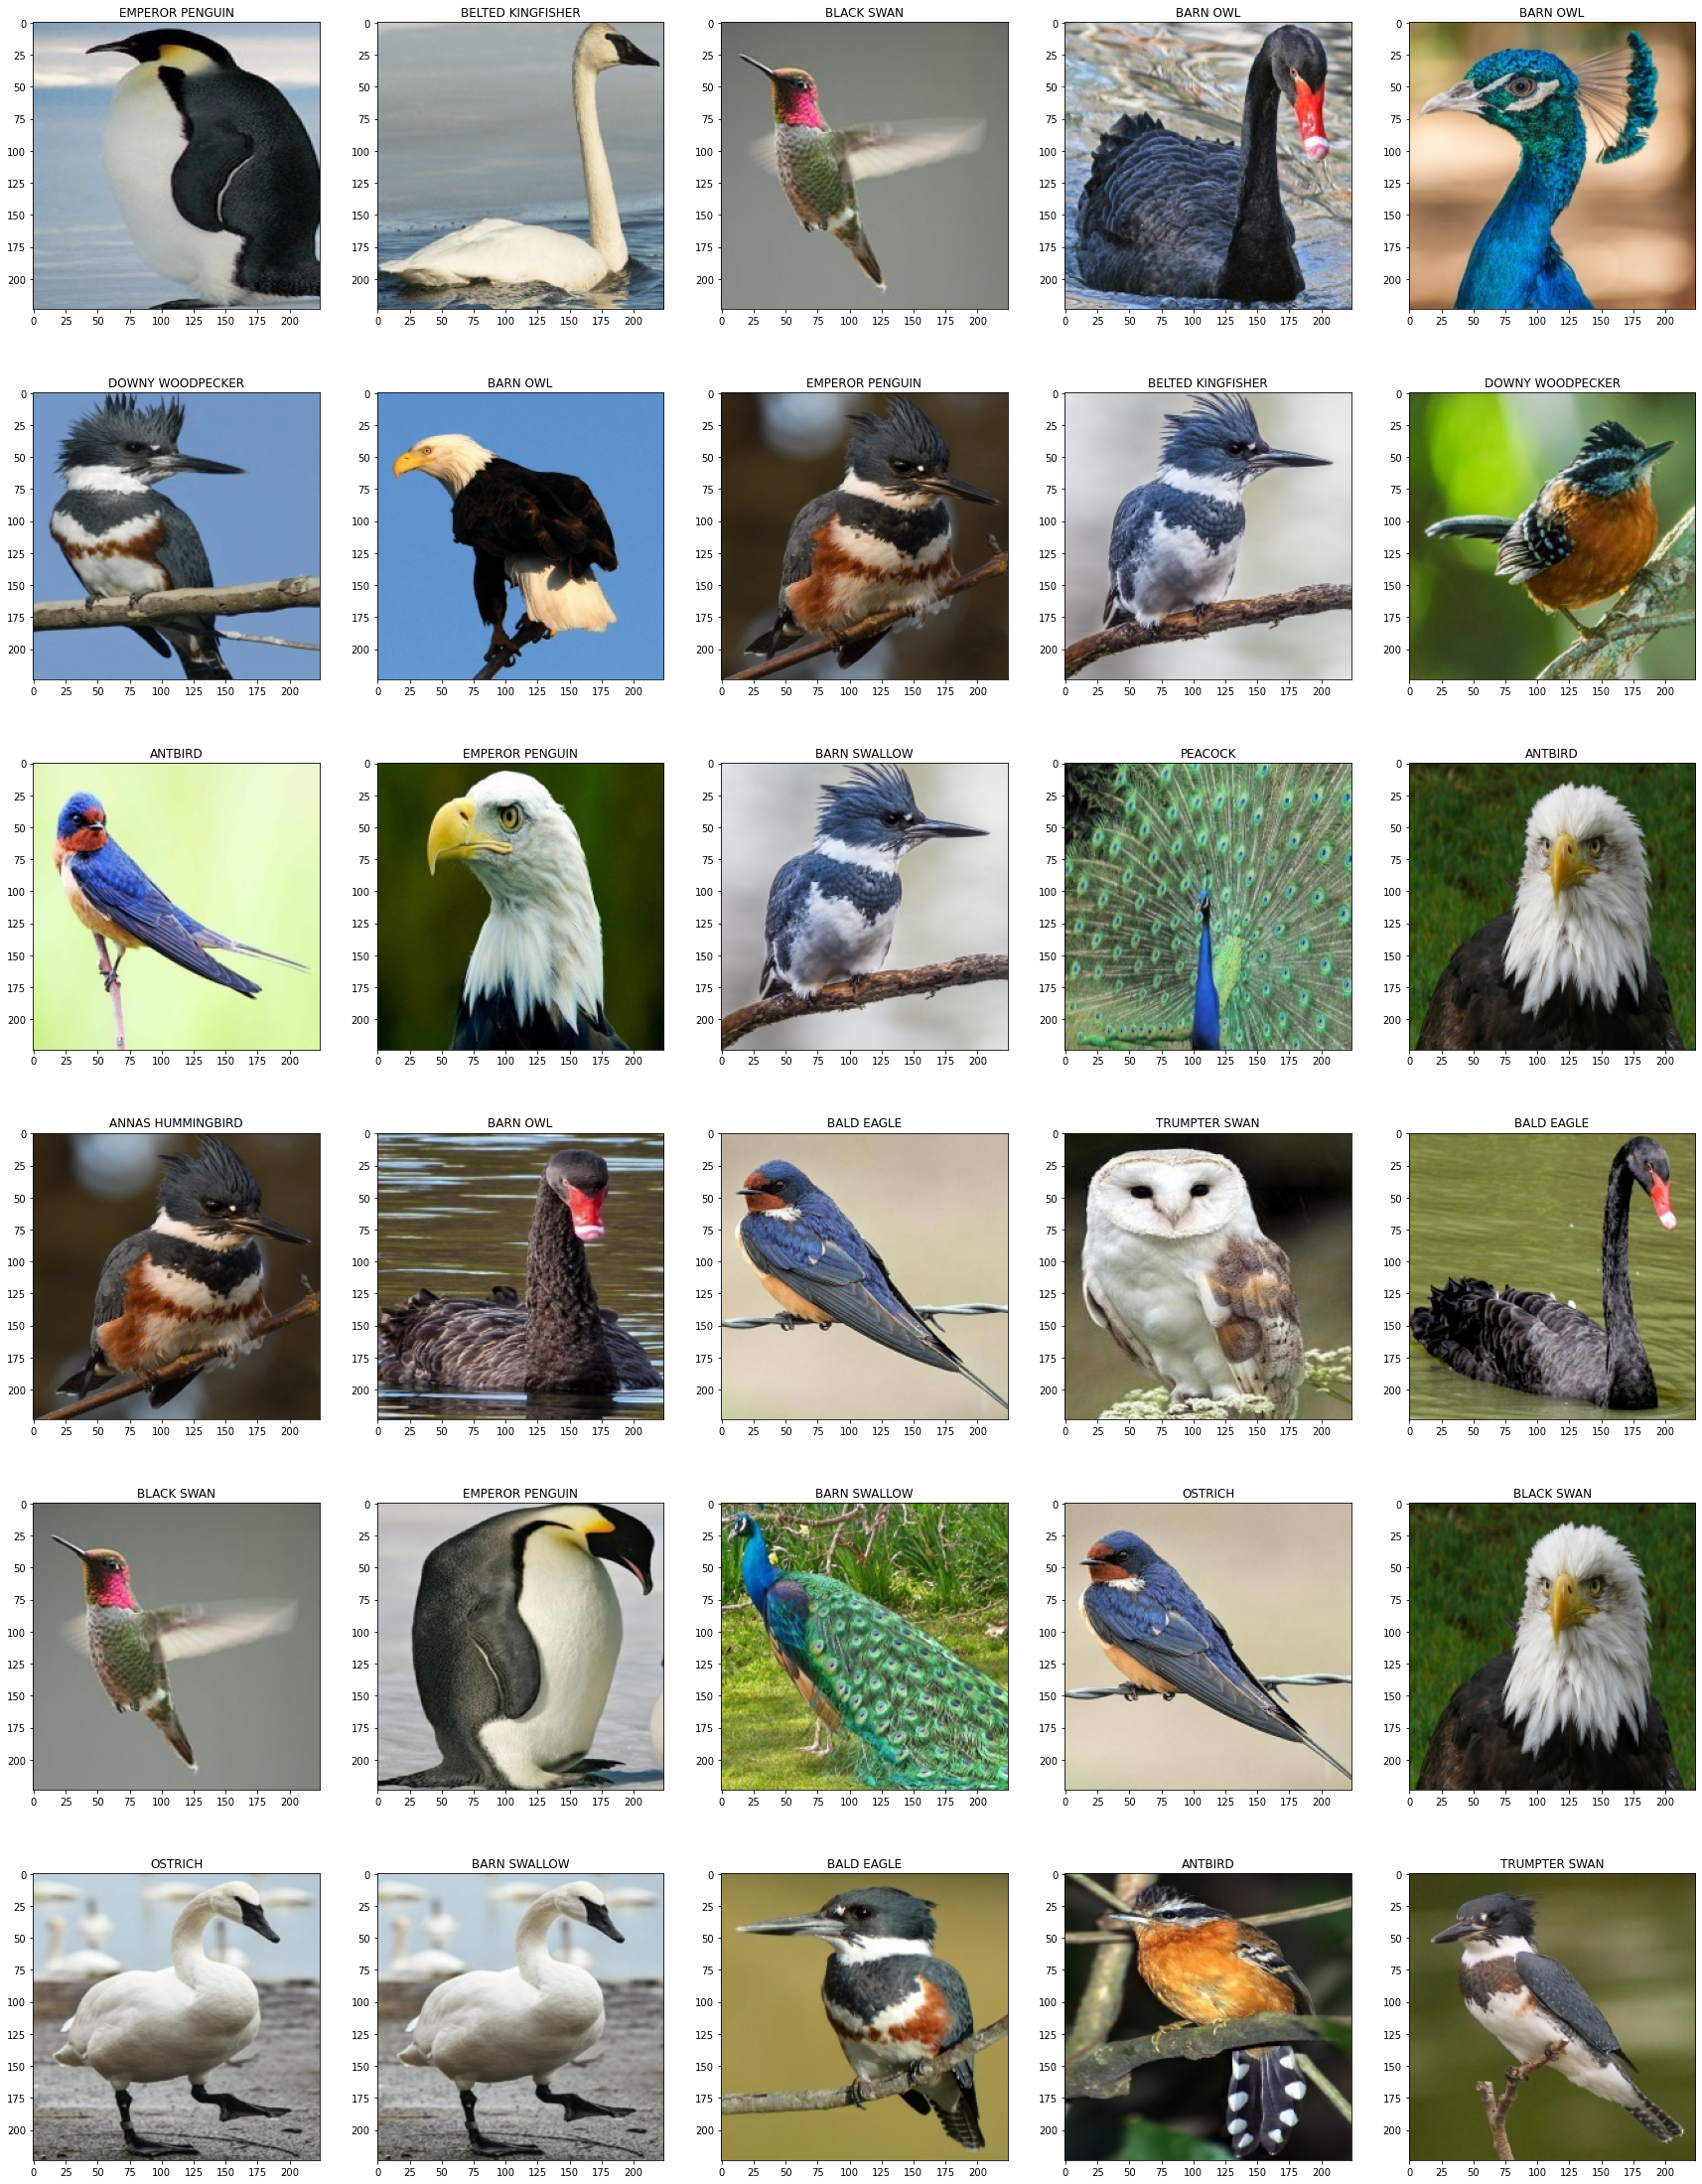

In [61]:
i = 0
columns = 5
text_labels = []
predicted_index = 0
plt.figure(figsize=(30, 40))

for batch in test_batches:
    pred = model.predict(test_batches)
    for p in pred:
        for n in range(0,12):
            if round(p[n], 2) > 0.80:
                predicted_index = n
                text_labels.append(class_dict[predicted_index])
                break
    plt.subplot(6, columns, i + 1)
    plt.title(text_labels[i])
    imgs, labels = batch
    imgplot = plt.imshow((imgs[0]).astype(np.uint8))
    i += 1
    if i % 30 == 0:
        break
        
plt.show()         